#**Hàm phát sinh input/output**

##Hàm phát sinh input tự thực hiện

In [ ]:
# Hàm phát sinh liên kết ngẫu nhiên giữa các đỉnh
import random
def generate_edge(V, m):
  max_edges = (V * (V - 1)) // 2 # Tìm số cạnh của đa giác V đỉnh
  edges = [] # Mảng edges chứa các cạnh
  if max_edges != 0:
    n_edges = random.randint(int(max_edges * 0.25), int(max_edges * 0.5)) # Random số cạnh 
    i = 1
    while i <= n_edges:
      a = random.randint(1, V) 
      b = random.randint(1, V)
      while a == b:
        a = random.randint(1, V)
      # Giới hạn 1 đỉnh không liên kết quá m đỉnh 
      # a
      while True:
        sum = 0
        for k in edges:
          sum += k.count(a)
        if sum >= m:
          a = random.randint(1, V)
        else:
          break
      # b
      while True:
        sum = 0
        for k in edges:
          sum += k.count(b)
        if sum >= m:
          b = random.randint(1, V)
        else:
          break
      temp = [a, b]
      #print("temp: ", temp)
      if temp not in edges and temp[::-1] not in edges:
        edges.append(temp)
        i += 1
  return edges, n_edges

####Kiểm tra tính đúng đắn của dữ liệu phát sinh từ hàm trên

In [ ]:
n_dinh = 10
print("So dinh:", n_dinh)
edges_, n_edges = generate_edge(n_dinh, 4)
print("edges: ",edges_)

So dinh: 10
edges:  [[3, 9], [1, 2], [1, 10], [5, 6], [1, 5], [4, 1], [5, 7], [5, 2], [10, 4], [9, 7], [4, 2], [8, 3]]


Graph with 10 nodes and 12 edges
[1, 2, 1, 3, 3, 1, 1, 2, 2, 2]
['red', 'blue', 'red', 'blue', 'blue', 'yellow', 'red', 'yellow', 'red', 'blue']


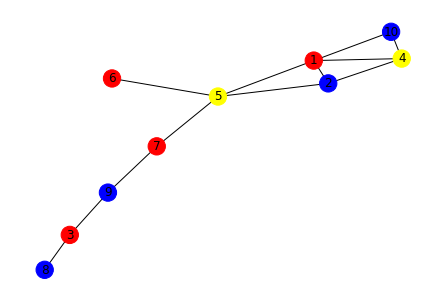

In [ ]:
import networkx

G = networkx.Graph()
G.add_edges_from([[3, 9], [1, 2], [1, 10], [5, 6], [1, 5], [4, 1], [5, 7], [5, 2], [10, 4], [9, 7], [4, 2], [8, 3]])

print(G)
# Để chạy được đoạn sau phải chạy hàm addEdge ở mục Greedy Coloring phía dưới
graphs = addEdge(G.edges, 10)
result = Greedy_Coloring(graphs, 10, 4)
print(result)

import networkx
if result != False: 
  resultColors = result
  color_map = []
  for node in G:
      if resultColors[node - 1] == 1:
        color_map.append('red')
      elif resultColors[node - 1] == 2:
        color_map.append('blue')
      elif resultColors[node - 1] == 3:
        color_map.append('yellow')
      elif resultColors[node - 1] == 4:
        color_map.append('green')
      elif resultColors[node - 1] == 5:
        color_map.append('violet')
  print(color_map)
  networkx.draw(G, node_color=color_map, with_labels=True)
else:
  print("Can't draw the graph with m colors")


##**Hàm phát sinh input sử dụng Thư viện có sẵn**

In [ ]:
from networkx.generators.random_graphs import fast_gnp_random_graph #generate a random graph with networkx
def generate_edge_by_networkx(n, e):
  G = fast_gnp_random_graph(n, e) 
  return G, G.edges

##Kiểm tra tính đúng đắn của dữ liệu phát sinh từ hàm trên

G:  Graph with 10 nodes and 16 edges
Edges:  [[4], [4, 5, 7, 9], [5, 6, 7, 8], [7, 9], [0, 1, 5, 7], [1, 2, 4], [2, 7, 8, 9], [1, 2, 3, 4, 6], [2, 6], [1, 3, 6]]
[1, 1, 1, 1, 2, 3, 2, 3, 3, 3]
['red', 'red', 'red', 'red', 'blue', 'yellow', 'blue', 'yellow', 'yellow', 'yellow']


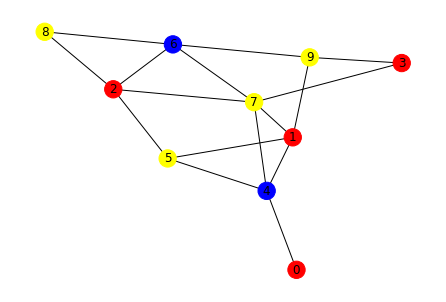

In [ ]:
# Kiểm tra bằng giải thuật Greedy Coloring
G, graphs = generate_edge_by_networkx(10, 0.375)
# Để chạy được đoạn sau phải chạy hàm addEdge_networks ở mục Greedy Coloring phía dưới
graphs = addEdge_networks(graphs, 10)
result = Greedy_Coloring(graphs, 10, 4)
print("G: ", G)
print("Edges: ", graphs)
print(result)
import networkx
if result != False:
  resultColors = result

  color_map = []
  for node in G:
      if resultColors[node] == 1:
        color_map.append('red')
      elif resultColors[node] == 2:
        color_map.append('blue')
      elif resultColors[node] == 3:
        color_map.append('yellow')
      elif resultColors[node] == 4:
        color_map.append('green')
  print(color_map)
  networkx.draw(G, node_color=color_map, with_labels=True)
else:
  print("Do not draw the graphs with m colors")


#**Greedy Coloring**

##**Mã nguồn**

In [ ]:
# Sử dụng hàm này với input phát sinh tự thực hiện
def addEdge(Edges, V):
  G = [[] for i in range(V)] 
  # Tạo 1 cạnh giữa 2 đỉnh
  for i in Edges:
    G[i[0] - 1].append(i[1] - 1) 
    G[i[1] - 1].append(i[0] - 1)
  return G

In [ ]:
# Sử dụng hàm này với input phát sinh từ thư viện có sẵn
def addEdge_networks(Edges, V):
  G = [[] for i in range(V)] 
  # Tạo 1 cạnh giữa 2 đỉnh
  for i in Edges:
    G[i[0]].append(i[1]) 
    G[i[1]].append(i[0])
  return G

In [ ]:
def Greedy_Coloring(G, V, m):
    color = [-1] * V # color là mảng chứa màu của mỗi đỉnh
    available = [False] * V # Mảng available thể hiện các màu của các 
                            # đỉnh liền kề với đinh đang xét
    color[0] = 1 # Tô màu số 0 cho đỉnh 0
    sum_E = 0 # Sử dụng cho việc thực nghiệm
    sum_m = 1 # Sử dụng cho việc thực nghiệm
    for i in range(1, V):
        for u in G[i]:
            if color[u] != -1: 
                available[color[u] - 1] = True # Nếu đỉnh liền kề đã được đánh số màu thì màu đó
                                           # sẽ không được dùng cho đỉnh hiện tại
        count = 1 # Biến count biểu thị số thứ tự màu

        # Tìm màu có sẵn đầu tiên cho đỉnh đang xét
        while count <= m:
            if available[count - 1] == False: 
                break
            count += 1
        # Nếu số màu cần gán cho các đỉnh mà nhiều hơn số màu giới hạn thì sẽ
        # trả về False (Không thực hiện tô được cho đồ thị)
        if count > m:
            return False
        # Gán màu cho đỉnh
        color[i] = count

        # Cập nhật lại các giá trị của available về False 
        # để thực hiện vòng lặp tiếp theo
        for u in G[i]:
            if color[u] != -1:
                available[color[u] - 1] = False
        sum_E += len(G[i])
        sum_m += count
    
    return color, sum_E, sum_m

In [ ]:
n = 5
print("So dinh: ", n)
m = 4
print("So mau gioi han: ", m)
paths = [[1, 2], [1, 5], [2, 5], [4, 5], [2, 4], [2, 3], [3, 4]]
G = addEdge(paths, n)
print(G)
result = Greedy_Coloring(G, n, m)
print("Result: ", result)
print("So mau dung de to: ", max(result))

So dinh:  5
So mau gioi han:  4
[[1, 4], [0, 4, 3, 2], [1, 3], [4, 1, 2], [0, 1, 3]]
Result:  [1, 2, 1, 3, 4]
So mau dung de to:  4


## Leetcode 1042 submission:
Link: https://leetcode.com/problems/flower-planting-with-no-adjacent/
```
class Solution:
    def gardenNoAdj(self, n: int, paths: List[List[int]]) -> List[int]:
        def addEdge(Edges, V):
            G = [[] for i in range(V)] 
            # Tạo 1 cạnh giữa 2 đỉnh
            for i in Edges:
              G[i[0] - 1].append(i[1] - 1) 
              G[i[1] - 1].append(i[0] - 1)
            return G
        def Greedy_Coloring(G, V):
            color = [-1] * V # color là mảng chứa màu của mỗi đỉnh
            available = [False] * V # Mảng available thể hiện các màu của các 
                                    # đỉnh liền kề với đinh đang xét
            color[0] = 1 # Tô màu số 1 cho đỉnh 1
            for i in range(1, V):
                for u in G[i]:
                    if color[u] != -1: 
                        available[color[u]] = True # Nếu đỉnh liền kề đã được đánh số màu thì màu đó
                                                   # sẽ không được dùng cho đỉnh hiện tại
                count = 1 # Biến count biểu thị số thứ tự màu

                # Tìm màu có sẵn đầu tiên cho đỉnh đang xét
                while count < V:
                    if available[count] == False: 
                        break
                    count += 1
                # Gán màu cho đỉnh
                color[i] = count

                # Cập nhật lại các giá trị của available về False 
                # để thực hiện vòng lặp tiếp theo
                for u in G[i]:
                    if color[u] != -1:
                        available[color[u] - 1] = False
            return color
        
        G = addEdge(paths, n)
        return Greedy_Coloring(G, n)
```



##Test thời gian chạy

### Hàm sinh Input tự làm

In [ ]:
import time
i = 5
while i < 105:
  print("----------")
  print("So dinh:", i)
  edges_, n_edges = generate_edge(i, i)
  print("So canh", n_edges)
  print("edges: ",edges_)
  G = addEdge(edges_, i)
  #print("\n")
  #%timeit Greedy_Coloring(G, i)
  start = time.time()
  Greedy_Coloring(G, i, i)
  end = time.time()
  print("Time: {:.5f}".format(end - start))
  i = int(i*1.2)

> Thời gian thực hiện hàm tự thực hiện rất lâu nên nhóm không lấy input từ dữ liệu này để thực nghiệm mà sẽ lấy input từ thư viện có sẵn bên dưới

### Thư viện có sẵn

In [ ]:
import cProfile
i = 5
# Phát sinh số đỉnh và tính thời gian chạy của thuật toán ứng với số đỉnh và 
# tập cạnh phát sinh 
while i < 100000:
  print("----------")
  G, graphs = generate_edge_by_networkx(i, 0.375)
  print(G)
  graphs = addEdge_networks(graphs, i)
  result, E, m = Greedy_Coloring(graphs, i, i)
  print("Tong canh ke cua moi dinh: ", E)
  print("Tong mau da su dung: ", m)
  cProfile.run("Greedy_Coloring(graphs, i, i)")
  i = int(i*1.5)

----------
Graph with 5 nodes and 3 edges
Tong canh ke cua moi dinh:  5
Tong mau da su dung:  7
         8 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-5-b2b7cb0c6734>:1(Greedy_Coloring)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.len}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}


----------
Graph with 7 nodes and 8 edges
Tong canh ke cua moi dinh:  14
Tong mau da su dung:  14
         10 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <ipython-input-5-b2b7cb0c6734>:1(Greedy_Coloring)
  

##**Đo độ phức tạp**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [ ]:
# data phát sinh của thư viện có sẵn
data_Greedy_net = pd.read_csv('/content/drive/MyDrive/Phân tích thiết kế thuật toán/Data_greedy.csv')
X_net = data_Greedy_net[['n']]
y_net = data_Greedy_net[['time']]
sum = data_Greedy_net[['n + 1 + sum_E + sum_m']]
# Model LinearRegression
model = LinearRegression()

In [ ]:
data_Greedy_net

,n,sum_E,sum_m,time,n + 1 + sum_E + sum_m,O((n - 1)*(E + m) + n + 1),Unnamed: 6,O(log(n),Unnamed: 8,O(n),Unnamed: 10,O(n^2),Unnamed: 12,O(nlog(n)),Unnamed: 14,O(n^3),Unnamed: 16,O(sqrt(n)),Unnamed: 18
0,5.0,5.0,7.0,0.000,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.0,14.0,14.0,0.000,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,28.0,18.0,0.000,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15.0,78.0,36.0,0.000,130.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.0,169.0,62.0,0.000,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,33.0,377.0,115.0,0.000,526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,49.0,917.0,227.0,0.000,1194.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73.0,1914.0,435.0,0.001,2423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109.0,4284.0,822.0,0.001,5216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,163.0,9867.0,1736.0,0.002,11767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_Greedy_net
X_net = X_net.dropna()
y_net = y_net.dropna()
sum = sum.dropna()

In [ ]:
X_net = X_net.astype(float)
X_net = np.array(X_net).reshape(-1,1)
y_net = np.array(y_net).reshape(-1,1)
sum = np.array(sum).reshape(-1,1)

In [ ]:
# O(log(n))
print("O(log(n))")
model.fit(np.log2(X_net), y_net)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")
# O(n)
print("O(n)")
model.fit(X_net, y_net)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(n^2)
print("O(n^2)")
model.fit(X_net**2, y_net)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(nlog(n))
print("O(nlog(n))")
model.fit(X_net * np.log2(X_net), y_net)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(n^3)
print("O(n^3)")
model.fit(X_net**3, y_net)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(sqrt(n))
print("O(sqrt(n)")
model.fit(np.sqrt(X_net), y_net)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")
#
print("O(n + 1 + sum_E + sum_m)")
model.fit(sum, y_net)
print(model.coef_)
print(model.intercept_)

O(log(n))
[[0.37557723]]
[-2.06247389]
------------------------------------
O(n)
[[0.00084582]]
[-0.37149097]
------------------------------------
O(n^2)
[[1.07322199e-07]]
[-0.03180962]
------------------------------------
O(nlog(n))
[[6.62480215e-05]]
[-0.30271935]
------------------------------------
O(n^3)
[[1.18831373e-11]]
[0.12158275]
------------------------------------
O(sqrt(n)
[[0.06624866]]
[-0.90110482]
------------------------------------
O(n + 1 + sum_E + sum_m)
[[2.65062966e-07]]
[-0.03440969]


# **Backtracking**

**Psuedocode**
```
If current > n Then
    Found solution
    return True
Endif

for color:=1 to 4 Do
    if isSafe(current, graph, color, colors) is True then
        color of current = color
        
        if backtrack(current + 1, graph, colors, n) is True then
            return True
        endif
        
        color of current = 0
    endif
    
Endfor

return False
```

Leetcode 1042 submission:

```
class Solution:
    def gardenNoAdj(self, n: int, paths: List[List[int]]) -> List[int]:
        graph = defaultdict(list) #build a bidrectional graph
        for u, v in paths:
            graph[u].append(v)
            graph[v].append(u)
        

        def isSafe(current, graph, color, colors):
            for i in graph[current]:
                if color == colors[i-1]:
                    return False

            return True

        def backtrack(current, graph, colors, n):
            if current == n:
                return True

            for color in range(1, 6):
                if isSafe(current, graph, color, colors):
                    colors[current - 1] = color
                    if backtrack(current + 1, graph, colors, n): 
                        return colors

                    colors[current - 1] = 0

            return False
        colors = [0] * n
        return backtrack(0, graph, colors, n)
```

![picture](https://cdn.discordapp.com/attachments/776502212444422144/881158634640408576/unknown.png)

In [ ]:
#backtracking code

def isSafe(current, graph, color, colors):
    for i in graph[current]:
        if color == colors[i-1]:
            return False

    return True

def backtrack(current, graph, colors, n):
    if current > n:
        return True #Found solution

    for color in range(1, n): #n colors
        if isSafe(current, graph, color, colors):
            colors[current - 1] = color
            if backtrack(current + 1, graph, colors, n): 
                return colors

            colors[current - 1] = 0
        
    return False

def graphcoloring(graph, n):
    colors = [0] * n
    return backtrack(0, graph, colors, n)

In [ ]:
#paths to graph conversion

from collections import defaultdict

def PathsToGraph(paths, n):
    graph = defaultdict(list) #build a bidrectional graph
    for u, v in paths:
        graph[u].append(v)
        graph[v].append(u)
    return graph

In [ ]:
#test

n = 5
paths = [[1,2],[2,3],[3,4],[4,1],[1,3],[2,4]]
graph = PathsToGraph(paths, n)
graphcoloring(graph, n)

[1, 2, 3, 4, 1]

In [ ]:
#Thực nghiệm bằng hàm input tự làm

import time
i = 5
with open('backtracking.csv', 'w') as f:
  f.write('n,colors,time\n')
  print('n,colors,time')
  while i < 50:
      edges_, n_edges = generate_edge(i, i)
      G = PathsToGraph(edges_, i)
      start = time.time()
      colors = graphcoloring(G, i)
      end = time.time()
      colors = set(colors)
      f.write('%s,%s,' %(i, len(colors)))
      f.write("{:.5f}\n".format(end-start))
      print(f"{i},{len(colors)},", end = '')
      print("{:.5f}".format(end-start))
      i = int(i * 1.2)

n,colors,time
5,2,0.00003
6,2,0.00002
7,3,0.00002
8,3,0.00002
9,4,0.00003
10,3,0.00005
12,4,0.00004
14,4,0.00005
16,5,0.00005
19,6,0.00009
22,6,0.00007
26,6,0.00008
31,6,0.00010
37,10,0.00020
44,11,0.00028


In [ ]:
#Input conversion for networkx graph

from collections import defaultdict

def PathsToGraphNetworkx(paths, n):
    graph = defaultdict(list) #build a bidrectional graph
    for u, v in paths:
        u = u + 1
        v = v + 1
        graph[u].append(v)
        graph[v].append(u)
    return graph

In [ ]:
#Thực nghiệm bằng input tạo từ thư viện
import sys
sys.setrecursionlimit(20000)

import time
i = 300
with open('backtrackingNetworkx.csv', 'w') as f:
  f.write('n,colors,time\n')
  print('n,colors,time')
  while i < 2000:
      G, edges_ = generate_edge_by_networkx(i, 0.7)
      graph = PathsToGraphNetworkx(edges_, i)
      start = time.time()
      colors = graphcoloring(graph, i)
      end = time.time()
      colors = set(colors)
      f.write('%s,%s,' %(i, len(colors)))
      f.write("{:.5f}\n".format(end-start))
      print(f"{i},{len(colors)},", end = '')
      print("{:.5f}".format(end-start))
      i = int(i * 1.1)

n,colors,time
300,73,0.04772
330,79,0.06280
363,85,0.07994
399,90,0.10443
438,97,0.14565
481,104,0.18063
529,115,0.24826
581,121,0.33272
639,135,0.46607
702,144,0.53822
772,156,0.69141
849,171,0.94657
933,185,1.28488
1026,199,1.65957
1128,216,2.20784
1240,232,2.87165
1364,249,3.84515
1500,270,5.31163
1650,293,6.86667
1815,319,9.02949
1996,349,12.23120


Graph with 10 nodes and 30 edges
[(0, 1), (0, 4), (0, 5), (0, 6), (0, 8), (0, 9), (1, 2), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (3, 7), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (8, 9)]
[2, 1, 2, 1, 3, 3, 4, 2, 5, 1]
['blue', 'red', 'blue', 'red', 'yellow', 'yellow', 'green', 'blue', 'red']


ValueError: ignored

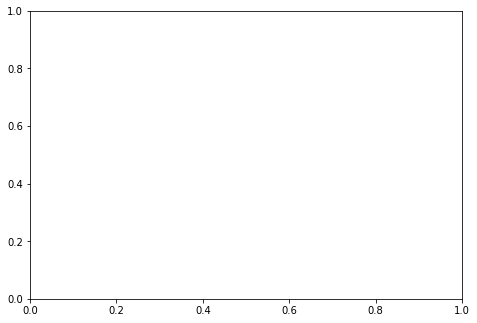

In [ ]:
#Test đúng đắn input của thư viện/output của thuật toán

import networkx
n = 10
G = fast_gnp_random_graph(n, 0.5)
print(G)
print(G.edges)
graph = PathsToGraphNetworkx(G.edges, n)
colors = [0] * n


resultColors = backtrack(0, graph, colors, n)
print(resultColors)

color_map = []
for node in G:
    if resultColors[node] == 1:
      color_map.append('red')
    elif resultColors[node] == 2:
      color_map.append('blue')
    elif resultColors[node] == 3:
      color_map.append('yellow')
    elif resultColors[node] == 4:
      color_map.append('green')
print(color_map)
networkx.draw(G, node_color=color_map, with_labels=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
data = data.reset_index()
data = pd.read_csv("backtrackingNetworkx.csv")
data.columns = ['nodes', 'colors', 'times']
data

,nodes,colors,times
0,300,73,0.04772
1,330,79,0.06280
2,363,85,0.07994
3,399,90,0.10443
4,438,97,0.14565
5,481,104,0.18063
6,529,115,0.24826
7,581,121,0.33272
8,639,135,0.46607
9,702,144,0.53822


In [ ]:
X = np.array(data['nodes']).reshape(-1, 1)
X

array([[ 300],
       [ 330],
       [ 363],
       [ 399],
       [ 438],
       [ 481],
       [ 529],
       [ 581],
       [ 639],
       [ 702],
       [ 772],
       [ 849],
       [ 933],
       [1026],
       [1128],
       [1240],
       [1364],
       [1500],
       [1650],
       [1815],
       [1996]])

In [ ]:
Z = np.array(data['colors'], dtype=np.float128).reshape(-1, 1)
Z


array([[ 73.],
       [ 79.],
       [ 85.],
       [ 90.],
       [ 97.],
       [104.],
       [115.],
       [121.],
       [135.],
       [144.],
       [156.],
       [171.],
       [185.],
       [199.],
       [216.],
       [232.],
       [249.],
       [270.],
       [293.],
       [319.],
       [349.]], dtype=float128)

In [ ]:
y = np.array(data['times']).reshape(-1, 1)
y

array([[ 0.04772],
       [ 0.0628 ],
       [ 0.07994],
       [ 0.10443],
       [ 0.14565],
       [ 0.18063],
       [ 0.24826],
       [ 0.33272],
       [ 0.46607],
       [ 0.53822],
       [ 0.69141],
       [ 0.94657],
       [ 1.28488],
       [ 1.65957],
       [ 2.20784],
       [ 2.87165],
       [ 3.84515],
       [ 5.31163],
       [ 6.86667],
       [ 9.02949],
       [12.2312 ]])

In [ ]:
model = LinearRegression()


In [ ]:
Z**X


True

In [ ]:
# O(log(n) + log(E))
print("O(log(n) + log(E))")
model.fit(np.log2(X), y)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")
# O(n + E)
print("O(n + E)")
model.fit(X, y)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(n^2 + E^2)
print("O(n^2 + E^2)")
model.fit(X**2, y)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(nlog(n) + Elog(E))
print("O(nlog(n) + Elog(E))")
model.fit(X * np.log2(X), y)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O (2^n + 2^E)
print("O (2^n + 2^E)")
model.fit(2**X , y)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(n^3 + E^3)
print("O(n^3 + E^3)")
model.fit(X**3, y)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(sqrt(n) + sqrt(E))
print("O(sqrt(n) + sqrt(E))")
model.fit(np.sqrt(X), y)
print(model.coef_)
print(model.intercept_)
print("------------------------------------")

# O(m^n)
print("O(m^n)")
model.fit((Z**X), y)
print(model.coef_)
print(model.intercept_)


O(log(n) + log(E))
[[0.00226851]]
[-0.01014388]
------------------------------------
O(n + E)
[[7.3021099e-05]]
[-0.00229552]
------------------------------------
O(n^2 + E^2)
[[4.80354158e-07]]
[-0.0003625]
------------------------------------
O(nlog(n) + Elog(E))
[[9.81294588e-06]]
[-0.00158973]
------------------------------------
O (2^n + 2^E)
[[-7.58078612e-23]]
[0.0033271]
------------------------------------
O(n^3 + E^3)
[[3.33273984e-09]]
[0.0004568]
------------------------------------
O(sqrt(n) + sqrt(E))
[[0.00107641]]
[-0.00567218]
------------------------------------
O(m^n)
[[-4.26520245e-23]]
[0.00333368]


In [ ]:
test = np.array(Z**X, dtype=np.float128).reshape(-1, 1)
test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in power
  """Entry point for launching an IPython kernel.


array([[9.92791468e+0558],
       [1.64793518e+0626],
       [2.39370173e+0700],
       [5.53046014e+0779],
       [1.60701381e+0870],
       [1.55968251e+0970],
       [1.28575300e+1090],
       [1.25400756e+1210],
       [1.91989761e+1361],
       [1.48070810e+1515],
       [1.23648807e+1693],
       [6.51175006e+1895],
       [1.86733656e+2115],
       [4.20006872e+2358],
       [1.83582508e+2633],
       [1.60361926e+2933],
       [2.60561016e+3268],
       [1.11082652e+3647],
       [2.14572264e+4070],
       [2.39932870e+4544],
       [             inf]], dtype=float128)

In [ ]:
#mse.csv writer
X = np.array(data['nodes']).reshape(-1, 1)
Z = np.array(data['colors']).reshape(-1, 1)
y = np.array(data['times']).reshape(-1, 1)
test = np.array(Z**X, dtype=np.float128).reshape(-1, 1)

model = LinearRegression()


#O(log(n))
model.fit(np.log2(X), y)
print('log(n) * ',model.coef_, model.intercept_)
A = (np.log2(X) * model.coef_ + model.intercept_)
A1 = (A - y)**2
# O(n)
model.fit(X, y)
print('n * ', model.coef_, model.intercept_)
B = (X * model.coef_ + model.intercept_)
B1 = (B-y)**2
# O(n^2)
model.fit(X**2, y)
print('n^2 *', model.coef_, model.intercept_)
C = (X**2 * model.coef_ + model.intercept_)
C1 = (C-y)**2
# O(nlog(n))
model.fit(X * np.log2(X), y)
print('O(nlog(n)) ' ,model.coef_, model.intercept_)
D = (X * np.log2(X) * model.coef_ + model.intercept_)
D1 = (D-y)**2
# O (2^n)
model.fit(2**X, y)
print('O(2^n) ', model.coef_, model.intercept_)
E = (2**X * model.coef_ + model.intercept_)
E1 = (E-y)**2
# O(n^3)
model.fit(X**3, y)
print('O(n^3) ', model.coef_, model.intercept_)
F = (X**3 * model.coef_ + model.intercept_)
F1 = (F-y)**2
# O(sqrt(n))
model.fit(np.sqrt(X), y)
print('O(sqrt(n)) ', model.coef_, model.intercept_)
G = (np.sqrt(X) * model.coef_ + model.intercept_)
G1 = (G-y)**2
# O(m^n)
model.fit(test, y)
print('O(m^n) ', model.coef_, model.intercept_)
H = (test * model.coef_ + model.intercept_)
H1 = (H-y)**2

with open('mse.csv', 'w') as f:
    f.write('n, colors, times,Olog(n),,O(n),,O(n^2),,O(nlog(n)),,O(2^n),,O(n^3),,O(sqrt(n)),,O(m^n))\n')
    for i in range(len(A)):
        f.write("%s,%s,%s," %(X[i], Z[i], y[i]))
        f.write("%s,%s," % (A[i], A1[i]))
        f.write("%s,%s," % (B[i], B1[i]))
        f.write("%s,%s," % (C[i], C1[i]))
        f.write("%s,%s," % (D[i], D1[i]))
        f.write("%s,%s," % (E[i], E1[i]))
        f.write("%s,%s," % (F[i], F1[i]))
        f.write("%s,%s," % (G[i], G1[i]))
        f.write("%s,%s," % (H[i], H1[i]))
        f.write("\n")
    
    f.write(",,,,%s,,%s,,%s,,%s,,%s,,%s,,%s,,%s" %(np.average(A1), np.average(B1), np.average(C1), np.average(D1), np.average(E1), np.average(F1), np.average(G1), np.average(H1)))


f = open('mse.csv','r')
filedata = f.read()
f.close()

newdata = filedata.replace("[","")
newdata = newdata.replace("]","")
f = open('mse.csv','w')
f.write(newdata)
f.close()

log(n) *  [[3.26251017]] [-28.96023592]
n *  [[0.00605703]] [-3.14966914]
n^2 * [[2.91583121e-06]] [-0.79639108]
O(nlog(n))  [[0.0005368]] [-2.54471919]
O(2^n)  [[0.]] [2.34059524]
O(n^3)  [[1.52801032e-09]] [0.0149106]
O(sqrt(n))  [[0.35164863]] [-7.84234094]
O(m^n)  [[2.33215411e-19]] [1.84774449]
